In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv("Job_Placement_Data_Enhanced.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,3,98,1,0,94,Mid,Medium
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4,88,1,1,54,MNC,Low
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,2,41,1,1,82,Startup,Low
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,4,41,0,0,50,MNC,High
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,4,67,0,0,67,Mid,High


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 215 non-null    object 
 1   ssc_percentage         215 non-null    float64
 2   ssc_board              215 non-null    object 
 3   hsc_percentage         215 non-null    float64
 4   hsc_board              215 non-null    object 
 5   hsc_subject            215 non-null    object 
 6   degree_percentage      215 non-null    float64
 7   undergrad_degree       215 non-null    object 
 8   work_experience        215 non-null    object 
 9   emp_test_percentage    215 non-null    float64
 10  specialisation         215 non-null    object 
 11  mba_percent            215 non-null    float64
 12  status                 215 non-null    object 
 13  years_experience       215 non-null    int64  
 14  skills_match_percent   215 non-null    int64  
 15  num_ce

In [46]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,2.483721,70.413953,2.423256,0.483721,74.046512
std,10.827205,10.897509,7.358743,13.275956,5.833385,1.701694,17.235065,1.708259,0.500901,14.602447
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,40.000000,0.000000,0.000000,50.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,1.000000,58.000000,1.000000,0.000000,62.500000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,3.000000,71.000000,3.000000,0.000000,74.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,4.000000,86.000000,4.000000,1.000000,86.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,5.000000,99.000000,5.000000,1.000000,99.000000


## Analysis Objective

The goal of this analysis is to understand and predict the likelihood of a candidate successfully securing an internship placement based on a combination of academic performance, skills alignment, professional experience, and contextual factors related to the hiring environment.

through systematic exploratory data analysis, the study examines both individual feature behavior and multivariate interactions to identify patterns, dependencies, and conditional effects that influence placement outcomes.

Given the absence of a signal dominant predictor and the presence of overlapping feature distributions, the analysis aims not only to achieve predicate performance but also to compare different modeling approaches in terms of interpretability and their ability to capture nonlinear and interaction-driven decision structure.

The outcome is a set of validated predictive models accompanied by insights into the factors that most strongly influence internship placement decisions.

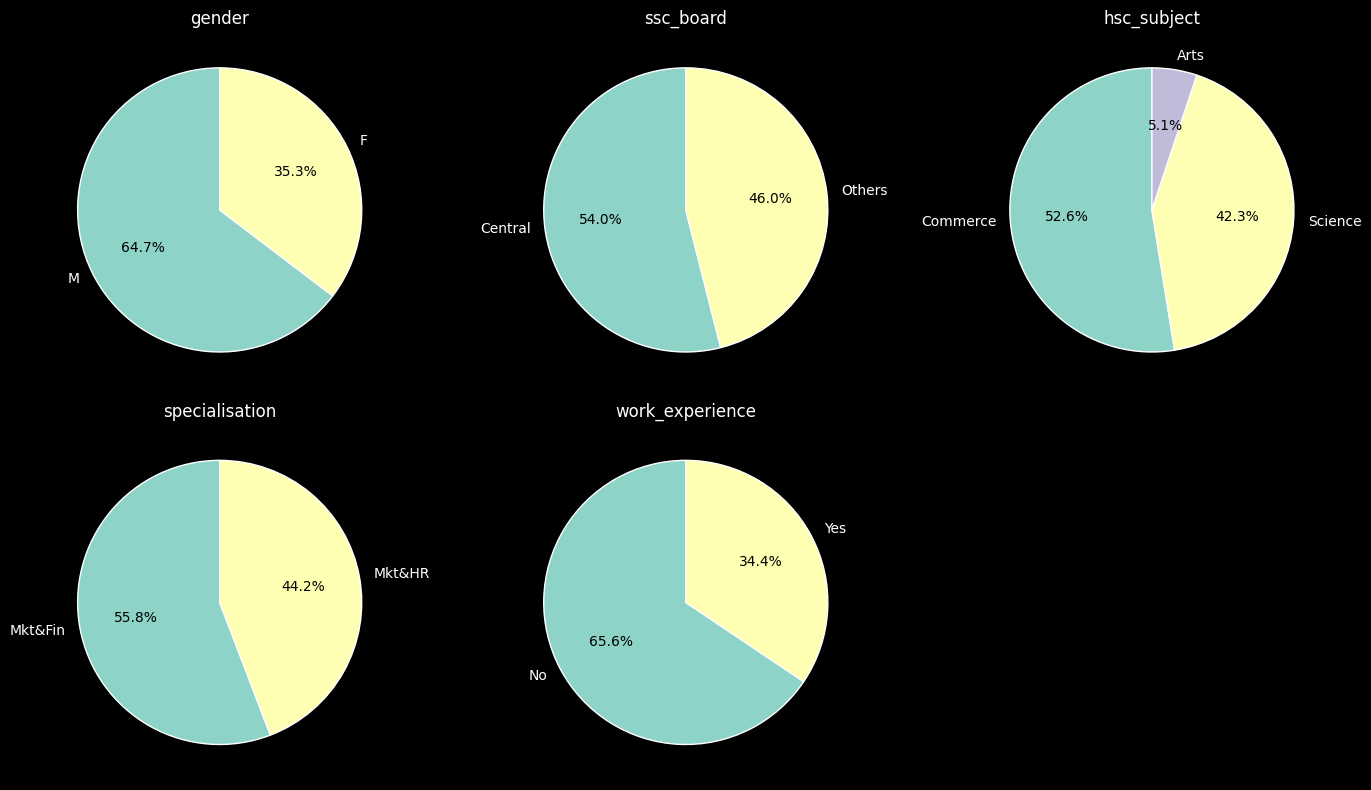

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

features_pie = ['gender', 'ssc_board', 'hsc_subject', 'specialisation', 'work_experience']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for ax, col in zip(axes, features_pie):
    counts = df[col].value_counts()

    wedges, texts, autotexts = ax.pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90
    )
    for text in autotexts:
        text.set_color('black')
    ax.set_title(col)

axes[len(features_pie)].axis('off')
plt.tight_layout()
plt.show()

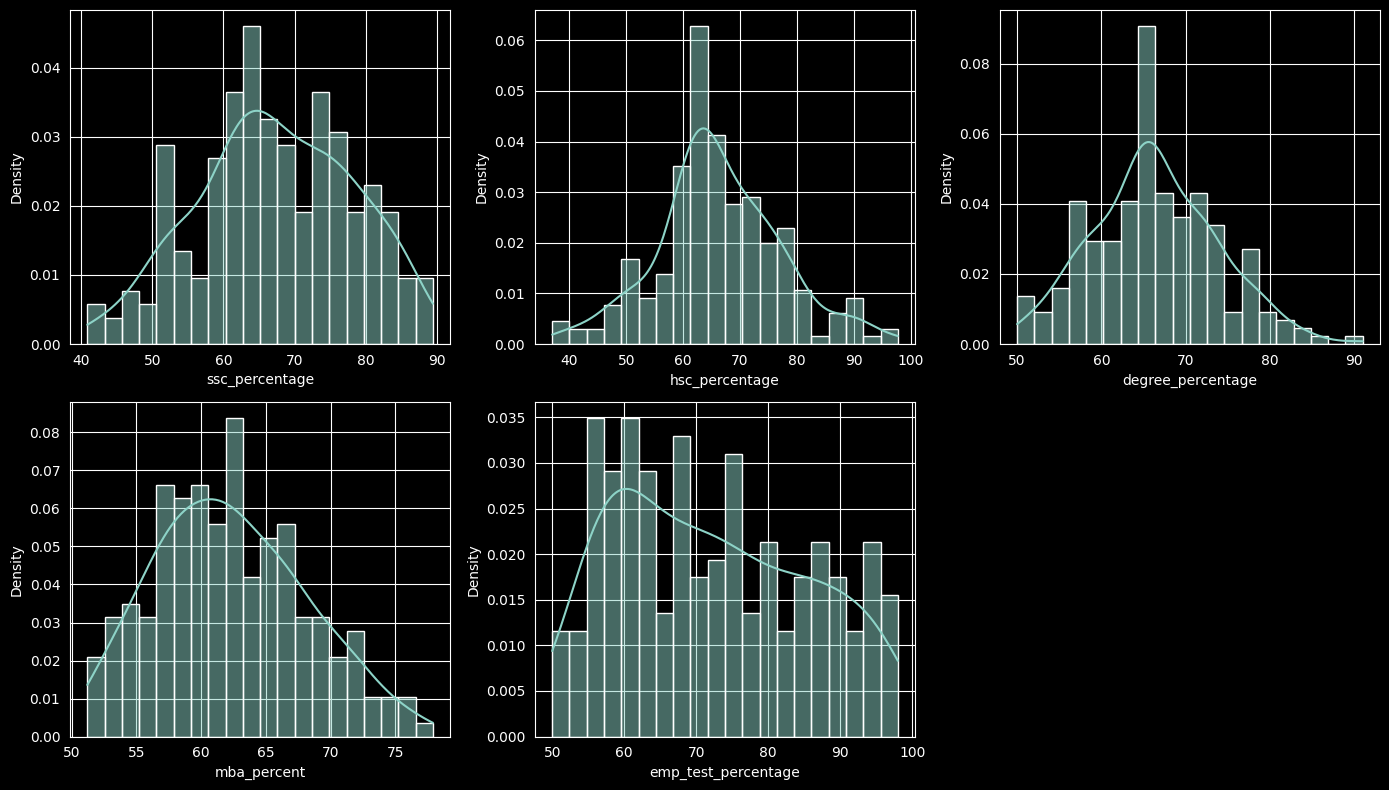

In [48]:
features_hist = ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'mba_percent', 'emp_test_percentage']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for ax, col in zip(axes, features_hist):
    sns.histplot(df[col], bins=20, kde=True, stat='density', ax=ax)
axes[len(features_hist)].axis('off')
plt.tight_layout()
plt.show()

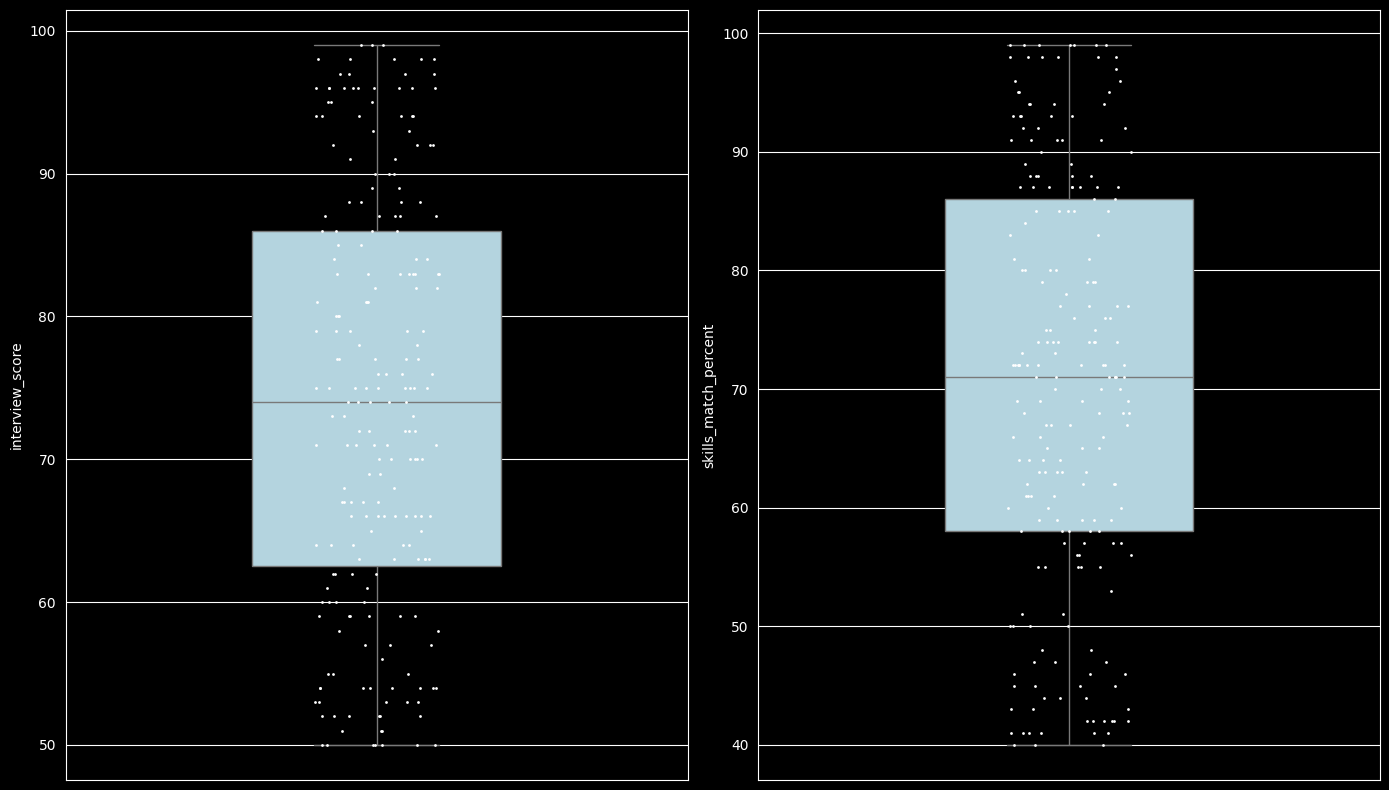

In [49]:
features_box = ['interview_score', 'skills_match_percent']

fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.flatten()

for ax, col in zip(axes, features_box):
    sns.boxplot(df[col], ax=ax, width=0.4, color='lightblue', showfliers=False)
    sns.stripplot(df[col], ax=ax, size=2, color='white')
plt.tight_layout()
plt.show()

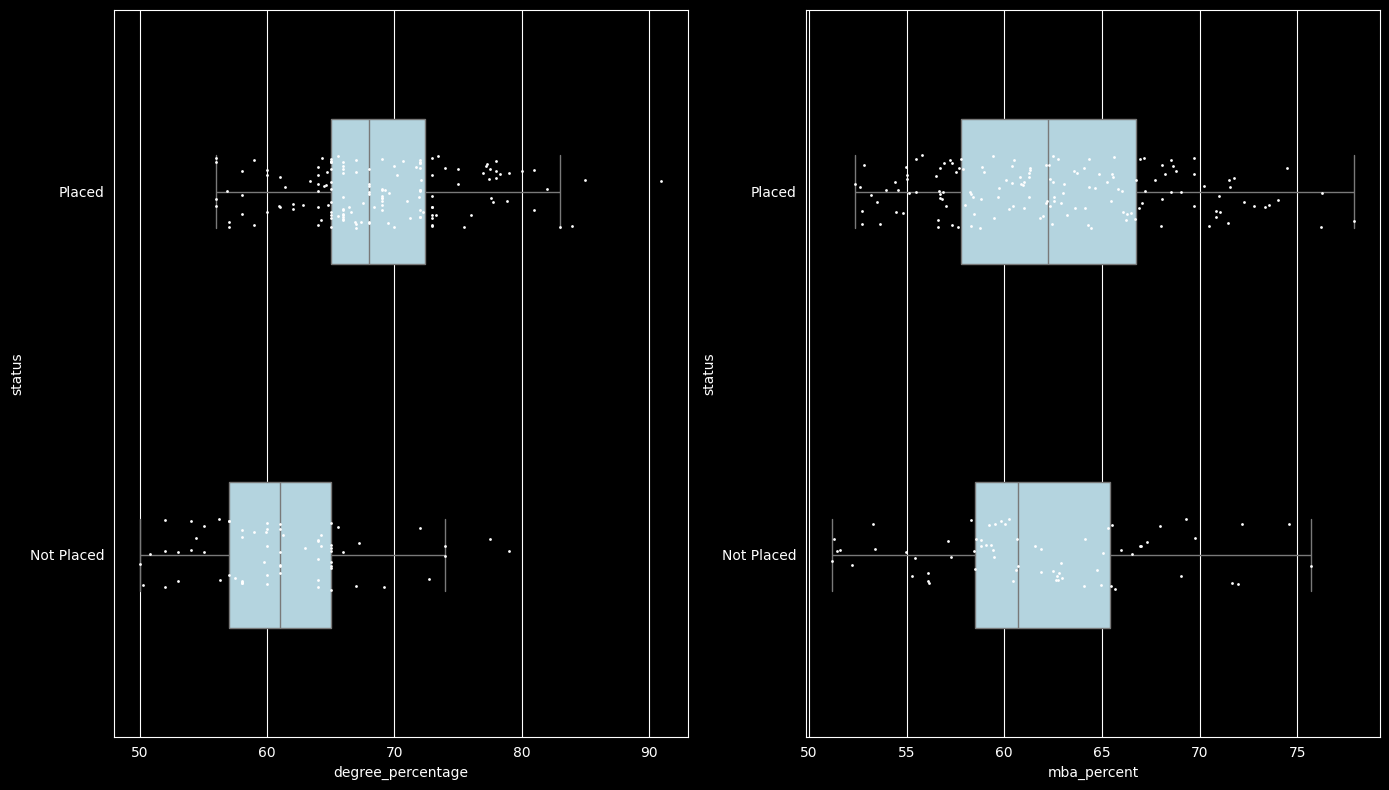

In [50]:
features_box_status = ['degree_percentage', 'mba_percent']

fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.flatten()

for ax, col in zip(axes, features_box_status):
    sns.boxplot(x=df[col], y=df['status'], ax=ax, width=0.4, color='lightblue', showfliers=False)
    sns.stripplot(x=df[col], y=df['status'], ax=ax, size=2, color='white')
plt.tight_layout()
plt.show()

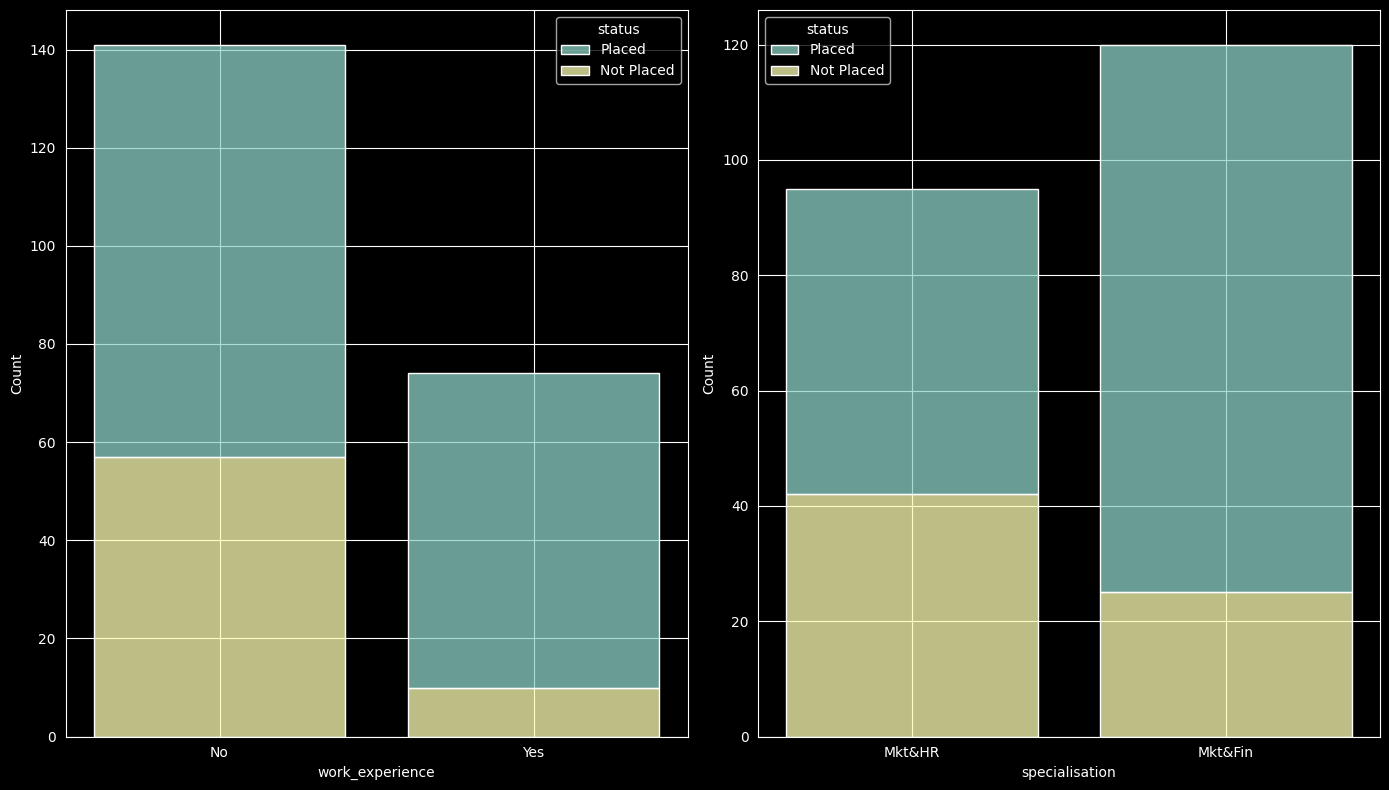

In [51]:
features_hist_status = ['work_experience', 'specialisation']

fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.flatten()

for ax, col in zip(axes, features_hist_status):
    sns.histplot(df, x=col, hue='status', multiple='stack', shrink=0.8, ax=ax)
plt.tight_layout()
plt.show()

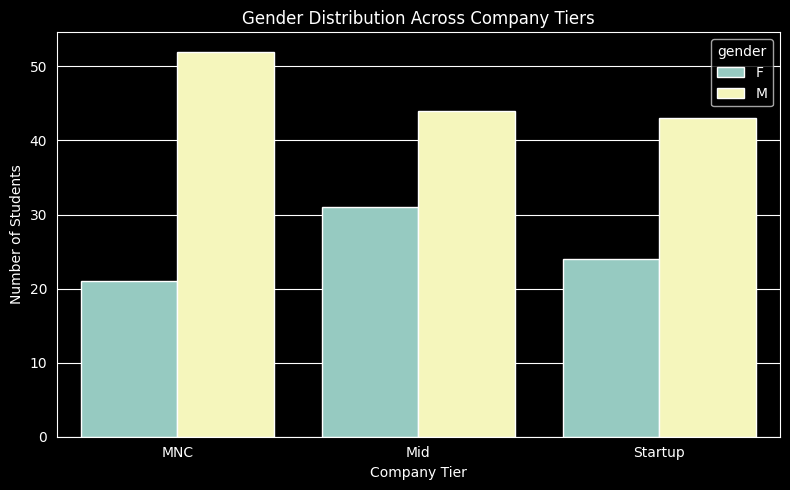

In [52]:
# count occurrences
counts = (
    df
    .groupby(['company_tier', 'gender'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=counts,
    x='company_tier',
    y='count',
    hue='gender'
)

plt.title('Gender Distribution Across Company Tiers')
plt.ylabel('Number of Students')
plt.xlabel('Company Tier')
plt.tight_layout()
plt.show()


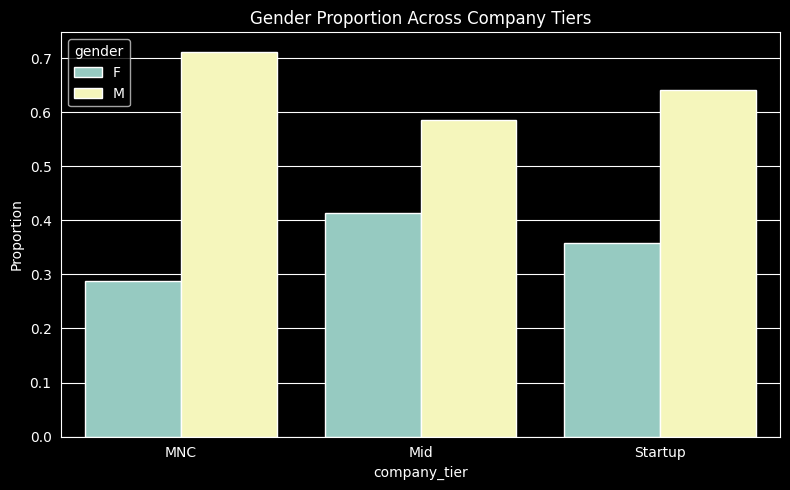

In [53]:
prop = (
    df
    .groupby(['company_tier', 'gender'])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .reset_index(name='proportion')
)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=prop,
    x='company_tier',
    y='proportion',
    hue='gender'
)

plt.ylabel('Proportion')
plt.title('Gender Proportion Across Company Tiers')
plt.tight_layout()
plt.show()


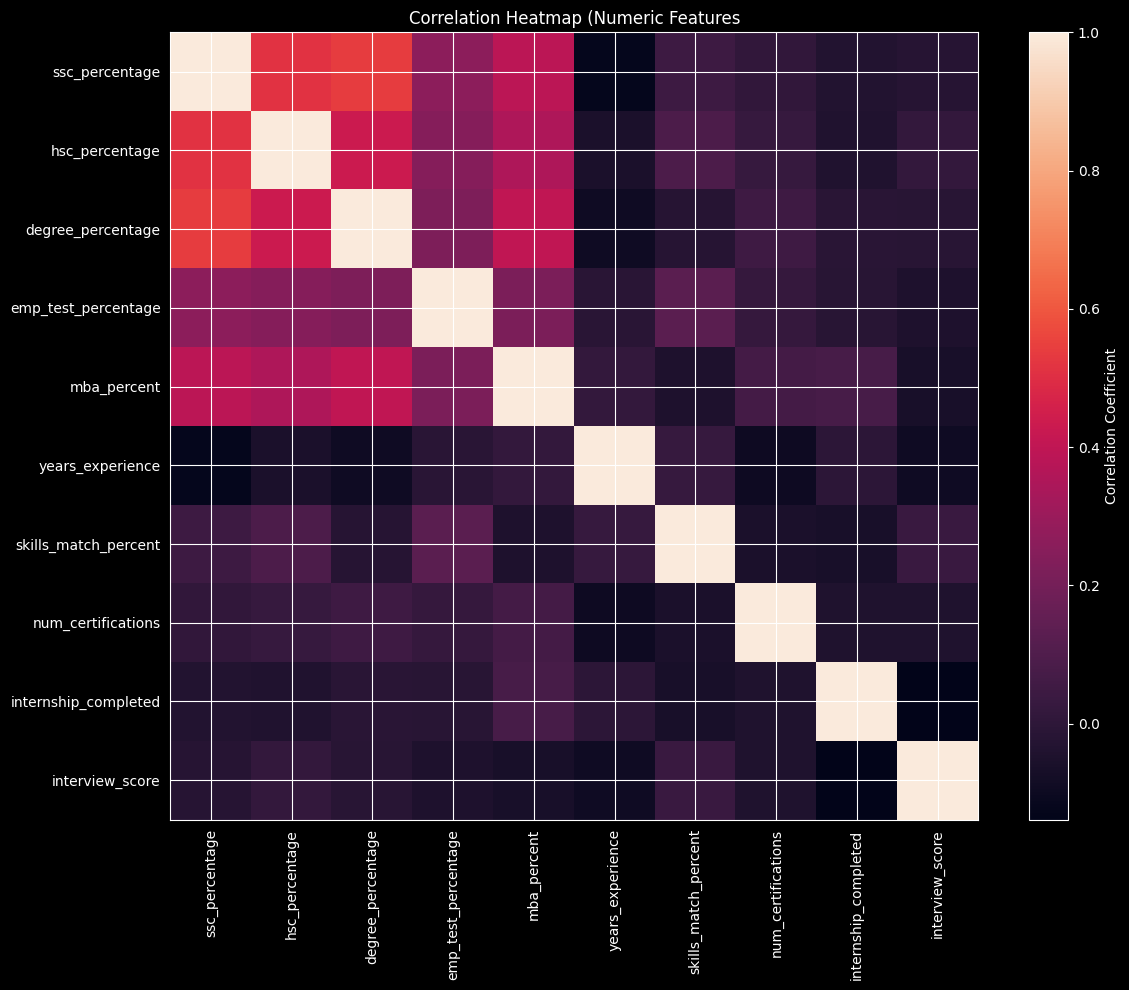

,feature_1,feature_2,abs_corr
0,ssc_percentage,degree_percentage,0.538404
1,ssc_percentage,hsc_percentage,0.511472
2,hsc_percentage,degree_percentage,0.434206
3,degree_percentage,mba_percent,0.402364
4,ssc_percentage,mba_percent,0.388478
5,hsc_percentage,mba_percent,0.354823
6,ssc_percentage,emp_test_percentage,0.261993
7,hsc_percentage,emp_test_percentage,0.245113
8,degree_percentage,emp_test_percentage,0.224470
9,emp_test_percentage,mba_percent,0.218055


In [54]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_columns].corr(method='pearson')

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr.values, aspect='auto')

ax.set_xticks(np.arange(len(numeric_columns)))
ax.set_yticks(np.arange(len(numeric_columns)))
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient')

ax.set_title('Correlation Heatmap (Numeric Features')
plt.tight_layout()
plt.show()

corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
top_pairs = (
    upper.stack()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "abs_corr"})
)

top_pairs.head(15)

In [55]:
df_viz = df.copy()

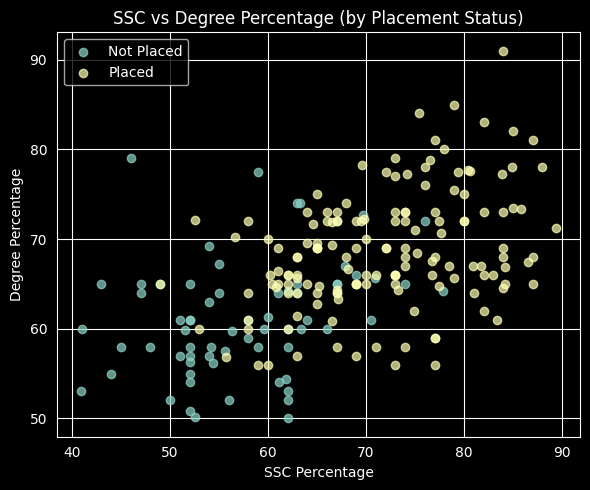

In [56]:
plt.figure(figsize=(6, 5))

for label, grp in df_viz.groupby('status'):
    plt.scatter(
        grp['ssc_percentage'],
        grp['degree_percentage'],
        label=label,
        alpha=0.7,
    )

plt.xlabel('SSC Percentage')
plt.ylabel('Degree Percentage')
plt.title("SSC vs Degree Percentage (by Placement Status)")
plt.legend()
plt.tight_layout()
plt.show()

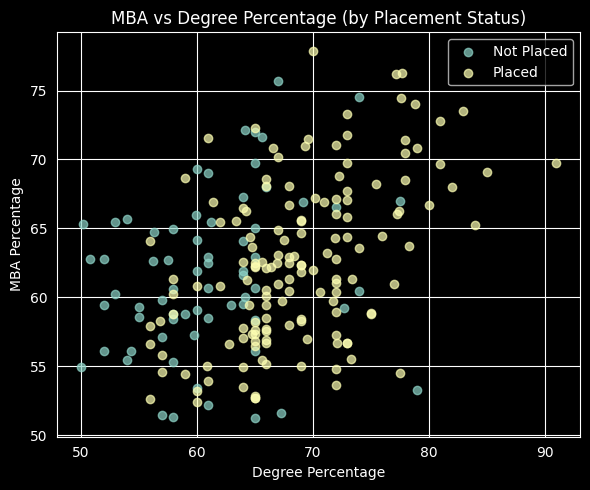

In [57]:
plt.figure(figsize=(6, 5))

for label, grp in df_viz.groupby('status'):
    plt.scatter(
        grp['degree_percentage'],
        grp['mba_percent'],
        label=label,
        alpha=0.7,
    )

plt.xlabel('Degree Percentage')
plt.ylabel('MBA Percentage')
plt.title("MBA vs Degree Percentage (by Placement Status)")
plt.legend()
plt.tight_layout()
plt.show()

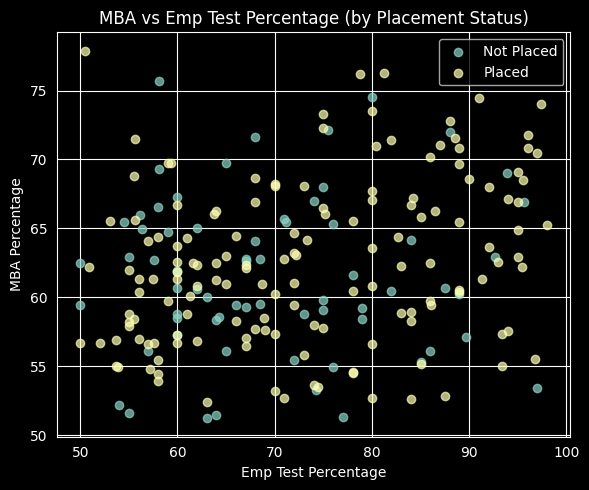

In [58]:
plt.figure(figsize=(6, 5))

for label, grp in df_viz.groupby('status'):
    plt.scatter(
        grp['emp_test_percentage'],
        grp['mba_percent'],
        label=label,
        alpha=0.7,
    )
plt.xlabel('Emp Test Percentage')
plt.ylabel('MBA Percentage')
plt.title("MBA vs Emp Test Percentage (by Placement Status)")
plt.legend()
plt.tight_layout()
plt.show()

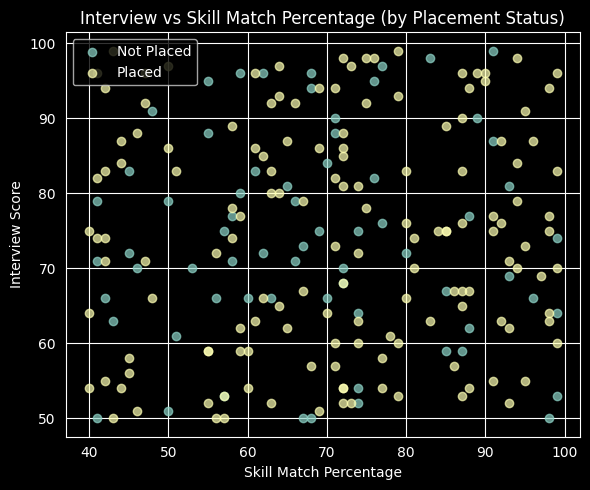

In [59]:
plt.figure(figsize=(6, 5))

for label, grp in df_viz.groupby('status'):
    plt.scatter(
        grp['skills_match_percent'],
        grp['interview_score'],
        label=label,
        alpha=0.7,
    )
plt.xlabel('Skill Match Percentage')
plt.ylabel('Interview Score')
plt.title("Interview vs Skill Match Percentage (by Placement Status)")
plt.legend()
plt.tight_layout()
plt.show()

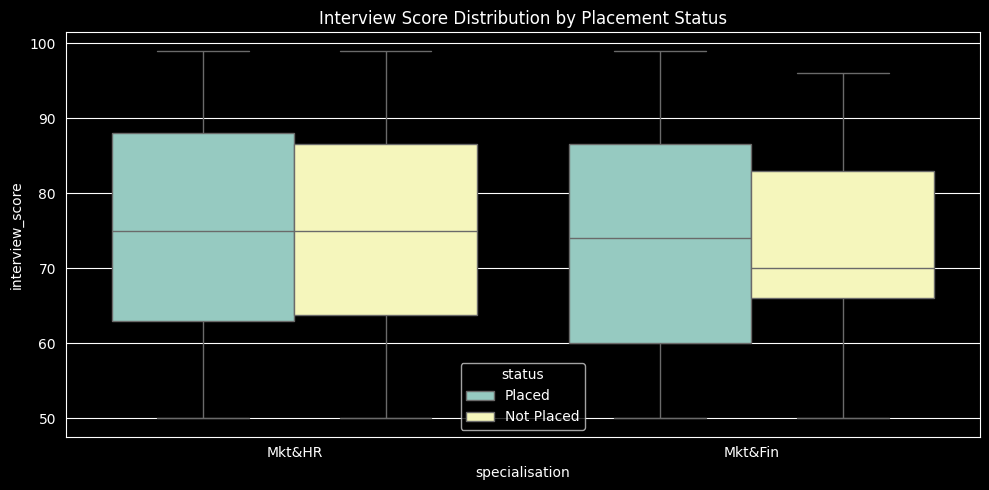

In [60]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="specialisation",
    y="interview_score",
    hue="status"
)

plt.title("Interview Score Distribution by Placement Status")
plt.tight_layout()
plt.show()

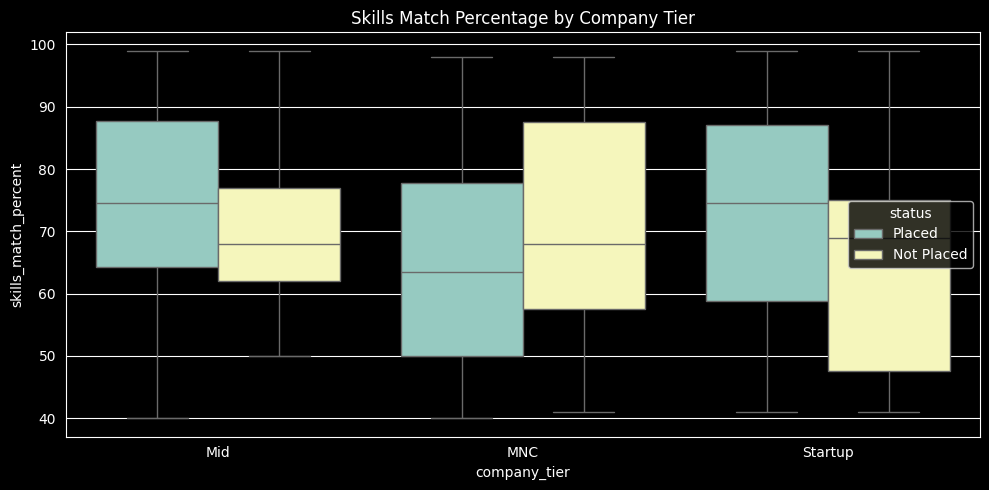

In [61]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=df,
    x="company_tier",
    y="skills_match_percent",
    hue='status'
)

plt.title('Skills Match Percentage by Company Tier')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

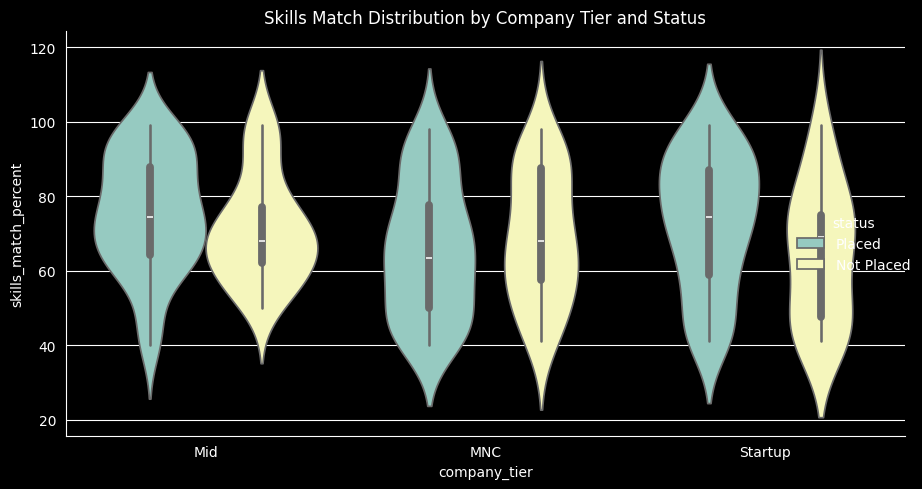

In [62]:
plt.figure(figsize=(10, 5))

sns.catplot(
    data=df,
    x='company_tier',
    y='skills_match_percent',
    hue='status',
    kind='violin',
    height=5,
    aspect=1.6
)

plt.title("Skills Match Distribution by Company Tier and Status")
plt.tight_layout()
plt.show()

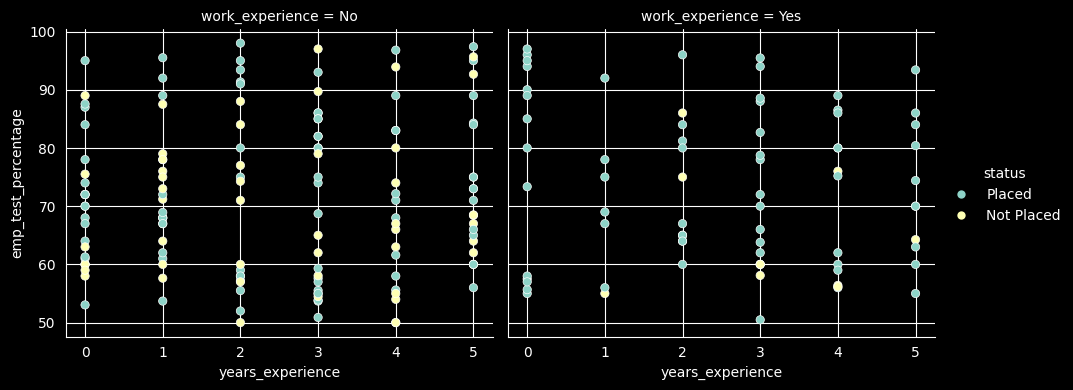

In [63]:
sns.relplot(
    data=df,
    x='years_experience',
    y='emp_test_percentage',
    hue='status',
    col='work_experience',
    kind='scatter',
    height=4,
    aspect=1.2
)

plt.show()

### PCA

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_pca = df.copy()
df_pca['status_bin'] = df_pca['status'].map({"Placed": 1, "Not Placed": 0})

numeric_cols = df_pca.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_cols.drop("status_bin")

X = df_pca[numeric_columns]
y = df_pca['status_bin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

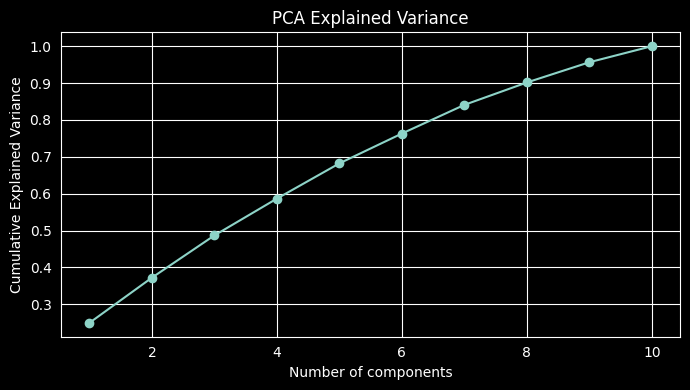

In [65]:
pca = PCA(random_state=42)
x_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(explained) + 1), explained.cumsum(), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title("PCA Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

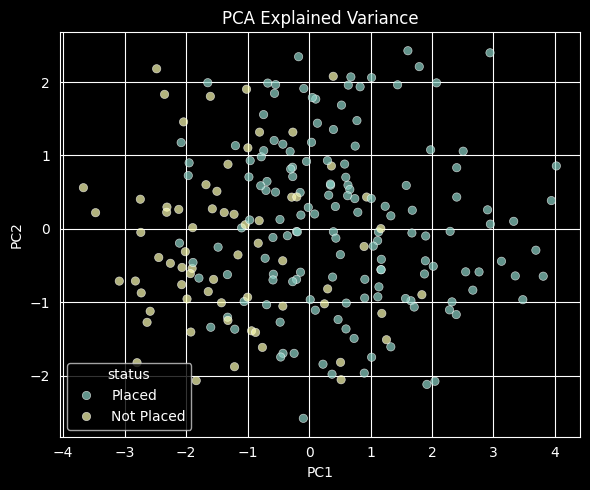

In [66]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    hue=df_pca['status'],
    alpha=0.7,
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Explained Variance')
plt.tight_layout()
plt.show()

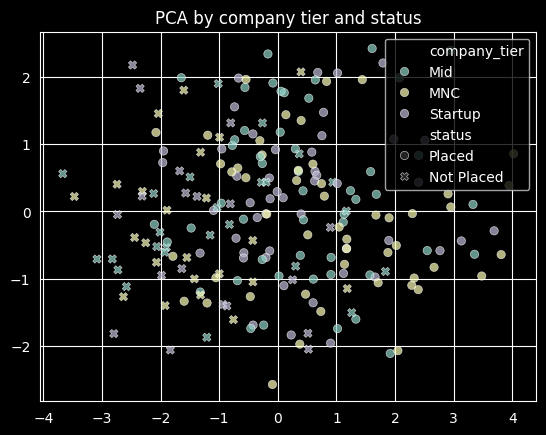

In [67]:
sns.scatterplot(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    hue=df_pca['company_tier'],
    style=df_pca['status'],
    alpha=0.7,
)
plt.title("PCA by company tier and status")
plt.show()

In [68]:
loading = pd.DataFrame(
    pca.components_.T[:, :2],
    index=numeric_columns,
    columns=['PC1', 'PC2']
)
loading.sort_values('PC1', ascending=False)

,PC1,PC2
ssc_percentage,0.507890,0.049378
degree_percentage,0.485340,-0.029421
hsc_percentage,0.471421,0.102480
mba_percent,0.419546,-0.244385
emp_test_percentage,0.306999,0.059249
num_certifications,0.057183,-0.064350
skills_match_percent,0.048532,0.397848
internship_completed,-0.010149,-0.582826
interview_score,-0.028048,0.603335
years_experience,-0.086445,-0.238403


## Preprocessing Pipeline
Define Features + Target

In [70]:
TARGET = "status"
X = df.drop(columns=[TARGET])
y = df[TARGET].map({"Placed": 1, "Not Placed": 0})

Split Data

In [71]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

Build Columns List

In [72]:
num_feature = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_feature = X_train.select_dtypes(include=["object"]).columns.tolist()

Preprocessors

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocess = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [74]:
categorical_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_preprocess, num_feature),
        ("categorical", categorical_preprocess, cat_feature)
    ],
    remainder="drop"
)

## Evaluation

In [76]:
from sklearn.model_selection import StratifiedKFold, cross_validate

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)


def evaluate_model(pipe, X_train_e, y_train_e, X_test_e, y_test_e, name="model"):
    pipe.fit(X_train_e, y_train_e)

    y_pred = pipe.predict(X_test_e)

    y_prob = None
    if hasattr(pipe, 'predict_proba'):
        y_prob = pipe.predict_proba(X_test_e)[:, 1]
    elif hasattr(pipe, 'decision_function'):
        y_prob = pipe.decision_function(X_test_e)

    return {
        "name": name,
        "accuracy": accuracy_score(y_test_e, y_pred),
        "precision": precision_score(y_test_e, y_pred, zero_division=0),
        "recall": recall_score(y_test_e, y_pred, zero_division=0),
        "f1": f1_score(y_test_e, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test_e, y_prob) if y_prob is not None else None,
        "confusion_matrix": confusion_matrix(y_test_e, y_pred),
        "report": classification_report(y_test_e, y_pred, zero_division=0),
    }

## Cross Validation

In [77]:
def cross_val_scores(pipe, X_train_c, y_train_c):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    scores = cross_validate(
        pipe, X_train_c, y_train_c,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False,
    )

    summary = {k: float(scores[f"test_{k}"].mean()) for k in scoring}
    summary.update({f"{k}_std": float(scores[f"test_{k}"].std()) for k in scoring})
    return summary

## Modeling
### Model 1
Logist Regression

In [83]:
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
log_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=5000, class_weight='balanced', verbose=False))
])

cv_summary_lr = cross_val_scores(log_reg, X_train, y_train)
test_result_lr = evaluate_model(log_reg ,X_train, y_train, X_test, y_test, name = 'log_reg')

print(f"cv_summary_lr: {cv_summary_lr}")
print(f"confusion_matrix: {test_result_lr["confusion_matrix"]}")
print(f"report: {test_result_lr["report"]}")

cv_summary_lr: {'accuracy': 0.8482352941176469, 'precision': 0.9354780485215267, 'recall': 0.8384057971014492, 'f1': 0.8799126058341328, 'roc_auc': 0.9123188405797101, 'accuracy_std': 0.0686480046966501, 'precision_std': 0.038148232021471246, 'recall_std': 0.10945627587535771, 'f1_std': 0.05999328557453001, 'roc_auc_std': 0.05272053735757231}
confusion_matrix: [[11  2]
 [ 5 25]]
report:               precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.93      0.83      0.88        30

    accuracy                           0.84        43
   macro avg       0.81      0.84      0.82        43
weighted avg       0.85      0.84      0.84        43



## Model 2
Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=4,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42,
    ))
])

cv_summary_tree = cross_val_scores(tree_clf, X_train, y_train)
test_results_tree = evaluate_model(tree_clf, X_train, y_train, X_test, y_test, name = 'tree')

print(f"cv_summary_tree: {cv_summary_tree}")
print(f"confusion_matrix tree: {test_results_tree["confusion_matrix"]}")
print(f"report tree: {test_results_tree["report"]}")


cv_summary_tree: {'accuracy': 0.7608403361344538, 'precision': 0.8507729468599032, 'recall': 0.7869565217391304, 'f1': 0.81543912079437, 'roc_auc': 0.8344515810276679, 'accuracy_std': 0.08513496763667418, 'precision_std': 0.05100415280953167, 'recall_std': 0.10358517596089209, 'f1_std': 0.07516332228666553, 'roc_auc_std': 0.07973513488538171}
confusion_matrix tree: [[12  1]
 [ 9 21]]
report tree:               precision    recall  f1-score   support

           0       0.57      0.92      0.71        13
           1       0.95      0.70      0.81        30

    accuracy                           0.77        43
   macro avg       0.76      0.81      0.76        43
weighted avg       0.84      0.77      0.78        43



## Model 3
Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        max_features='sqrt',
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=3,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
    ))
])

cv_summary_rf = cross_val_scores(rf_clf, X_train, y_train)
test_results_rf = evaluate_model(rf_clf, X_train, y_train, X_test, y_test, name = 'random_forest')

print(f"cv_summary_rf: {cv_summary_tree}")
print(f"confusion_matrix rf: {test_results_tree["confusion_matrix"]}")
print(f"report rf: {test_results_tree["report"]}")

cv_summary_rf: {'accuracy': 0.7608403361344538, 'precision': 0.8507729468599032, 'recall': 0.7869565217391304, 'f1': 0.81543912079437, 'roc_auc': 0.8344515810276679, 'accuracy_std': 0.08513496763667418, 'precision_std': 0.05100415280953167, 'recall_std': 0.10358517596089209, 'f1_std': 0.07516332228666553, 'roc_auc_std': 0.07973513488538171}
confusion_matrix rf: [[12  1]
 [ 9 21]]
report rf:               precision    recall  f1-score   support

           0       0.57      0.92      0.71        13
           1       0.95      0.70      0.81        30

    accuracy                           0.77        43
   macro avg       0.76      0.81      0.76        43
weighted avg       0.84      0.77      0.78        43



## Key Findings

- No single feature dominates the placement decision.
- Academic performance explains variance but not placement alone.
- Skills and interview scores matter conditionally.
- Linear aggregation of weak signals outperformed explicit rules.
- Tree-based models revealed interpretability but lower generalization.

## Limitation

- Small dataset size 250 rows.
- Possible recruiter bias embedded in labels.
- Potential information loss from one-hot encoding.

## Future Work

- Collect more samples across companies and years.
- Introduce richer skill features.
- apply feature_engineering and feature_selection with hypothesis testing.
- Try different models like Gradient boosting.
- Explore ordinal encoding for company_tiers.
- perform subgroup fairness analysis.